![image](./images/pandas.png)

Pandas est le package de prédilection pour traiter des données structurées.

Pandas est basé sur 2 structures extrêmement liées les Series et le DataFrame.

Ces deux structures permettent de traiter des données sous forme de tableaux indexés.

Les classes de Pandas utilisent des classes de Numpy, il est donc possible d'utiliser les fonctions universelles de Numpy sur les objets Pandas.

In [1]:
# on importe pandas avec :
import pandas as pd
import numpy as np
%matplotlib inline

# Les Series de Pandas

- Les Series sont indexées, c'est leur avantage sur les arrays de NumPy
- On peut utiliser les fonctions `.values` et `.index` pour voir les différentes parties de chaque Series
- On définit une Series par `pd.Series([,], index=['','',])`
- On peut appeler un élément avec `ma_serie['France']`
- On peut aussi faire des conditions :
```python
ma_serie[ma_serie>5000000]
```
```
'France' in ma_serie
```
- Les objets Series peuvent être transformés en dictionnaires en utilisant :
`.to_dict()`

**Exercice :**
    
Définir un objet Series comprenant la population de 5 pays puis afficher les pays ayant une population > 50’000’000.


In [2]:
ser_pop = pd.Series([70,8,300,1200], index=["France","Suisse","USA", "Chine"])

In [3]:
ser_pop

France      70
Suisse       8
USA        300
Chine     1200
dtype: int64

In [4]:
# indexation par clé
ser_pop["France"]

70

In [5]:
# indexation en position
ser_pop.iloc[0]

70

In [6]:
ser_pop[ser_pop>50]

France      70
USA        300
Chine     1200
dtype: int64

# D'autres opérations sur les objets series

- Pour définir le nom de la Series, on utilise `.name`
- Pour définir le titre de la colonne des observations, on utilise `.index.name`

**Exercice :**
    
Définir les noms de l’objet et de la colonne des pays pour la Series précédente


In [7]:
ser_pop.name = "Populations"
ser_pop.index.name = "Pays"
ser_pop

Pays
France      70
Suisse       8
USA        300
Chine     1200
Name: Populations, dtype: int64

# Les données manquantes

Dans pandas, les données manquantes sont identifiés avec les fonctions de Numpy (`np.nan`). On a d'autres fonctions telles que :

In [8]:
pd.isna(pd.Series([2,np.nan,4],index=['a','b','c']))

a    False
b     True
c    False
dtype: bool

In [9]:
pd.notna(pd.Series([2,np.nan,4],index=['a','b','c']))

a     True
b    False
c     True
dtype: bool

# Les dates avec pandas

- Python possède un module datetime qui permet de gérer facilement des dates
- Pandas permet d'appliquer les opérations sur les dates aux Series et aux DataFrame
- Le format es dates Python est `YYYY-MM-DD HH:MM:SS`

- On peut générer des dates avec la fonction `pd.date_range()` avec différente fréquences `freq=`
- On peut utiliser ces dates comme index dans un DataFrame ou dans un objet Series
- On peut changer la fréquence en utilisant `.asfreq()`
- Pour transformer une chaine de caractère en date, on utilise `pd.to_datetime()` avec l’option `dayfirst=True` si on est dans le cas français
-On pourra aussi spécifier un format pour accélérer le processus `%Y%m%d`

**Exercice :**

Créez un objet Series et ajoutez des dates partant du 3 octobre 2017 par jour jusqu’à aujourd’hui. Afficher le résultat dans un graphique (on utilisera la méthode `.plot()`

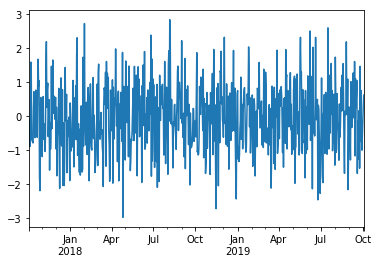

In [10]:
dates = pd.date_range(start= "2017-10-03", end=pd.datetime.today(),freq="D")
serie_action = pd.Series(np.random.randn(len(dates)),index=dates)
serie_action.plot()

In [11]:
serie_action.mean()

-0.05591721516853698

In [12]:
np.mean(serie_action)

-0.05591721516853698

In [13]:
dates

DatetimeIndex(['2017-10-03', '2017-10-04', '2017-10-05', '2017-10-06',
               '2017-10-07', '2017-10-08', '2017-10-09', '2017-10-10',
               '2017-10-11', '2017-10-12',
               ...
               '2019-09-24', '2019-09-25', '2019-09-26', '2019-09-27',
               '2019-09-28', '2019-09-29', '2019-09-30', '2019-10-01',
               '2019-10-02', '2019-10-03'],
              dtype='datetime64[ns]', length=731, freq='D')

# Aller plus loin avec les dates

- On peut définir avec pandas des fuseaux horaires
    - On utilise `.tz_localize("Europe/Paris")`
    - On peut changer de fuseau horaire avec `.tz_convert()`

- On peut aussi travailler sur des périodes plutôt que sur des dates
    - On utilise `pd.period_range()`


# Le DataFrame 

- Les DataFrame sont des objets très souples pouvant être construits de différentes façon
- On peut les construire en récupérant des données copier / coller, où directement sur Internet, ou en entrant les valeurs manuellement


- Les DataFrame se rapprochent des dictionnaires et on peut construire ces objets en utilisant `DataFrame(dico)`
- De nombreux détails sur la création des DataFrame se trouve sur ce site :

<http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.html>


# Construction de DataFrame

On peut simplement construire un DataFrame avec le classe pd.DataFrame() à partir de différentes structures :

In [14]:
frame1=pd.DataFrame(np.random.randn(10).reshape(5,2),
             index=["obs_"+str(i) for i in range(5)],
             columns=["col_"+str(i) for i in range(2)])
frame1

,col_0,col_1
obs_0,0.556973,2.174524
obs_1,1.235718,-0.881692
obs_2,-1.279501,0.304403
obs_3,-1.355077,-0.889355
obs_4,-0.766084,0.766825


In [15]:
# on charge les 100 premières lignes
airbnb_100 = pd.read_csv("./data/airbnb.csv",nrows=100)

In [16]:
airbnb_100.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object', length=106)

In [17]:
# on charge uniquement deux colonnes
airbnb_2col=pd.read_csv("./data/airbnb.csv",usecols=["price",'listing_url' ])

In [19]:
airbnb_2col.shape

(59126, 2)

In [20]:
%whos

Variable       Type             Data/Info
-----------------------------------------
airbnb_100     DataFrame               id                <...>n[100 rows x 106 columns]
airbnb_2col    DataFrame                                 <...>n[59126 rows x 2 columns]
dates          DatetimeIndex    DatetimeIndex(['2017-10-0<...>]', length=731, freq='D')
frame1         DataFrame                  col_0     col_1<...>obs_4 -0.766084  0.766825
np             module           <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
pd             module           <module 'pandas' from 'C:<...>es\\pandas\\__init__.py'>
ser_pop        Series           Pays\nFrance      70\nSui<...>Populations, dtype: int64
serie_action   Series           2017-10-03   -0.100038\n2<...>ngth: 731, dtype: float64


In [22]:
# on affiche les 5 premières lignes
airbnb_2col.head()

,listing_url,price
0,https://www.airbnb.com/rooms/3109,$75.00
1,https://www.airbnb.com/rooms/5396,$115.00
2,https://www.airbnb.com/rooms/7397,$115.00
3,https://www.airbnb.com/rooms/8522,$90.00
4,https://www.airbnb.com/rooms/9359,$75.00


# Opérations sur les DataFrame

On peut afficher le nom des colonnes :

In [23]:
print(frame1.columns)

Index(['col_0', 'col_1'], dtype='object')


On peut accéder à une colonne avec :
- `frame1.col_0` : attention au cas de nom de colonnes avec des espaces...
- `frame1['col_0']`

On peut accéder à une cellule avec :
- `frame1.loc['obs1','col_0']` : on utilise les index et le nom des colonnes
- `frame1.iloc[1,0]` : on utilise les positions dans le DataFrame


# Options de visualisation et de résumé

Pour afficher les 3 premières lignes, on peut utiliser :


In [24]:
frame1.head(3)

,col_0,col_1
obs_0,0.556973,2.174524
obs_1,1.235718,-0.881692
obs_2,-1.279501,0.304403


Pour afficher un résumé du DF :

In [25]:
frame1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, obs_0 to obs_4
Data columns (total 2 columns):
col_0    5 non-null float64
col_1    5 non-null float64
dtypes: float64(2)
memory usage: 120.0+ bytes


# Importer des données externes

Pandas est l'outil le plus efficace pour importer des données externes, il prend en charge de nombreux formats dont csv, Excel, SQL, SAS...


## Importation de données avec Pandas

Quel que soit le type de fichier, Pandas possède une fonction :
```python
frame=pd.read_...('chemin_du_fichier/nom_du_fichier',...)
```
Pour écrire un DataFrame dans un fichier, on utilise :
```python
frame.to_...('chemin_du_fichier/nom_du_fichier',...)
```

**Exercice :**
    
Importer un fichier `.csv` avec `pd.read_csv()`. On utilisera le fichier "./data/airbnb.csv"

In [35]:
#nba = pd.read_clipboard()

In [26]:
airbnb = pd.read_csv("./data/airbnb.csv")

C:\Users\s4d-asus-14\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (43,61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [27]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59126 entries, 0 to 59125
Columns: 106 entries, id to reviews_per_month
dtypes: float64(23), int64(21), object(62)
memory usage: 47.8+ MB


In [28]:
pd.read_csv("./data/Advertising.csv",index_col = 0, dtype = {"Radio":float},)

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8
10,199.8,2.6,21.2,10.6


# D'autres types de données

## JSON
Les objets JSON ressemblent à des dictionnaires.

On utilise le module `json` puis la fonction `json.loads()` pour transformer une entrée JSON en objet json

## HTML
On utilise `pd.read_html(url)`. Cet fonction est basée sur les packages `beautifulsoup` et `html5lib`

Cette fonction renvoie une liste de DataFrame qui représentent tous les DataFrame de la page. On ira ensuite chercher l'élément qui nous intéresse avec `frame_list[0]`

**Exercice :**
    
Importez un tableau en html depuis la page <http://www.fdic.gov/bank/individual/failed/banklist.html>

In [29]:
bank = pd.read_html("http://www.fdic.gov/bank/individual/failed/banklist.html")

In [30]:
print(type(bank),len(bank),type(bank[0]))

<class 'list'> 1 <class 'pandas.core.frame.DataFrame'>


In [31]:
bank[0]

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,The Enloe State Bank,Cooper,TX,10716,"Legend Bank, N. A.","May 31, 2019","August 22, 2019"
1,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,"December 15, 2017","July 24, 2019"
2,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,"October 13, 2017","August 12, 2019"
3,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb","May 26, 2017","January 29, 2019"
4,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,"May 5, 2017","March 22, 2018"
5,First NBC Bank,New Orleans,LA,58302,Whitney Bank,"April 28, 2017","January 29, 2019"
6,Proficio Bank,Cottonwood Heights,UT,35495,Cache Valley Bank,"March 3, 2017","January 29, 2019"
7,Seaway Bank and Trust Company,Chicago,IL,19328,State Bank of Texas,"January 27, 2017","January 29, 2019"
8,Harvest Community Bank,Pennsville,NJ,34951,First-Citizens Bank & Trust Company,"January 13, 2017","September 20, 2019"
9,Allied Bank,Mulberry,AR,91,Today's Bank,"September 23, 2016","May 13, 2019"


# Importer depuis Excel

On a deux approches pour Excel :
- On peut utiliser `pd.read_excel()`
- On peut utiliser la classe `pd.ExcelFile()`

Dans ce cas, on utilise :
```python
xlsfile=pd.ExcelFile('fichier.xlsx')
xlsfile.parse('Sheet1')
```

In [32]:
xlsfile=pd.ExcelFile('./data/ville.xls')

In [33]:
xlsfile.sheet_names

['ville', 'ville-ain']

In [34]:
ville = xlsfile.parse(xlsfile.sheet_names[0])

**Exercice :** 
    
Importez un fichier Excel avec les deux approches, on utilisera : `credit2.xlsx` et `ville.xls`

In [35]:
credit2 = pd.read_excel("./data/credit2.xlsx")

In [36]:
# écrire dans un fichier Excel
with pd.ExcelWriter('./data/credit2.xlsx', mode='a', engine = 'openpyxl') as writer:
    ville.to_excel(writer, sheet_name='villes')


In [37]:
import matplotlib.pyplot as plt

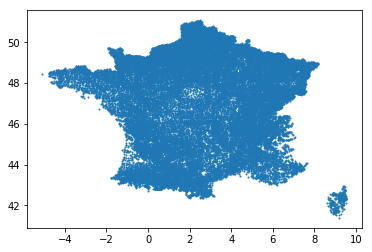

In [38]:
plt.scatter(ville[" Longitude "],ville[" Latitude "], s=1)

# Importer des données SQL

Pandas possède une fonction `read_sql()` qui permet d’importer directement des bases de données ou des queries dans des DataFrame

Il faut tout de même un connecteur pour accéder aux bases de données

Pour mettre en place ce connecteur, on utlise le package SQLAlchemy.

Suivant le type de base de données, on utilisera différents codes mais la structure du code est toujours la même

In [39]:
# on importe l'outil de connexion
from sqlalchemy import create_engine

On crée une connexion
```python
connexion=create_engine("sqlite:///(...).sqlite")
```

On utlise une des fonctions de Pandas pour charger les données
```python
requete="""select ... from ..."""
frame_sql=pd.read_sql_query(requete,connexion)
```

**Exercices :**
    
Importez la base de données SQLite salaries et récupérez la table Salaries dans un DataFrame 

In [40]:
connexion=create_engine("sqlite:///./data/salaries.sqlite")


In [41]:
connexion.table_names()

['Salaries']

In [42]:
requete = """select * from salaries"""
salaries = pd.read_sql_query(requete, connexion)

In [43]:
salaries.shape

(148654, 13)

In [44]:
salaries.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,,326373.19,326373.19,2011,,San Francisco,


# Données SAS

pd.read_sas()

Récupérer le fichier SAS `./data/bce_uai.sas7bdat`

In [45]:
data_sas = pd.read_sas("./data/bce_uai.sas7bdat",encoding = "iso-8859-1")

In [46]:
data_sas.head()

,CONTRAT_ETABLISSEMENT,CATEGORIE_JURIDIQUE,ETAT_ETABLISSEMENT,MINISTERE_TUTELLE,NUMERO_UAI,SIGLE_UAI,SECTEUR_PUBLIC_PRIVE,NATURE_UAI,COMMUNE,DATE_OUVERTURE,DATE_FERMETURE,DENOMINATION_PRINCIPALE_UAI,PATRONYME_UAI,NIVEAU_UAI,SECTEUR_CONTRAT
0,99,131,1,06,0010670Y,E.P.PU,PU,151,01001,1966-09-30,NaT,ECOLE PRIMAIRE PUBLIQUE,NaN,1,01
1,30,999,1,06,0010093W,E.P.PR,PR,151,01004,1971-03-12,NaT,ECOLE PRIMAIRE PRIVEE,STE MARIE,1,03
2,99,131,1,06,0011207G,E.E.PU,PU,151,01004,1984-09-01,NaT,ECOLE ELEMENTAIRE PUBLIQUE,JULES FERRY,1,01
3,99,200,1,06,0010001W,LP LYC METIER,PU,320,01004,1965-05-01,NaT,LP LYCEE DES METIERS,ALEXANDRE BERARD,1,01
4,99,131,1,06,0010445D,E.M.PU,PU,101,01004,1966-10-07,NaT,ECOLE MATERNELLE PUBLIQUE,JEAN JAURES,1,01


In [47]:
data_sas["PATRONYME_UAI"].value_counts()

JULES FERRY                     499
JACQUES PREVERT                 370
JEAN MOULIN                     362
SAINT JOSEPH                    350
JEAN JAURES                     319
NOTRE DAME                      315
VICTOR HUGO                     286
.                               255
ST JOSEPH                       253
JEAN DE LA FONTAINE             217
CENTRE                          210
R.P.I.                          208
JULES VERNE                     200
PAUL LANGEVIN                   194
MARCEL PAGNOL                   193
JEANNE D'ARC                    187
LOUIS PASTEUR                   177
JEAN MACE                       172
LOUISE MICHEL                   165
SAINTE MARIE                    164
SACRE COEUR                     159
ETS                             154
PAUL BERT                       148
MARIE CURIE                     146
ANATOLE FRANCE                  144
INTERCOMMUNALE                  140
ALBERT CAMUS                    138
FRANCOISE DOLTO             

# Les tris avec Pandas 

Pour effectuer des tris, on utilise :
- `.sort_index()` pour le tri des index
- `.sort_values()` pour le tri des données
- `.rank()` affiche le rang des observations

Il peut y avoir plusieurs tris dans la même opération. Dans ce cas, on utilise des listes de colonnes :
```python
frame.sort_values(["col_1","col_2"])
```

**Exercice :** 
    
Triez les données sur les salaires en se basant sur le BasePay et le JobTitle

In [48]:
salaries.sort_values(["JobTitle","BasePay"],ascending=[True,False])

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
20765,20766,NAPOLEON VIRAY,ACCOUNT CLERK,60838.2,0,0,,60838.20,60838.20,2011,,San Francisco,
21638,21639,SUSAN CHANG,ACCOUNT CLERK,51306.3,5406.34,1814.58,,58527.20,58527.20,2011,,San Francisco,
22972,22973,OLIVIA BOUDREAUX,ACCOUNT CLERK,49778.2,3811.68,1084.76,,54674.59,54674.59,2011,,San Francisco,
24573,24574,GLADYS PALACIOS,ACCOUNT CLERK,49777.9,0,624,,50401.92,50401.92,2011,,San Francisco,
24574,24575,JOCELYN VERGEL DE DIOS,ACCOUNT CLERK,49777.9,0,624.01,,50401.87,50401.87,2011,,San Francisco,
24766,24767,TSUI-HWA LEE,ACCOUNT CLERK,49777.9,0,0,,49777.86,49777.86,2011,,San Francisco,
24691,24692,MARISSA KENG,ACCOUNT CLERK,49777.8,0,264,,50041.85,50041.85,2011,,San Francisco,
24767,24768,OSCAR MIRON,ACCOUNT CLERK,49777.8,0,0,,49777.85,49777.85,2011,,San Francisco,
24758,24759,HELENA NG,ACCOUNT CLERK,49777.8,34.91,0,,49812.75,49812.75,2011,,San Francisco,
24674,24675,ROBERTO LIWANAG,ACCOUNT CLERK,49777.8,325.29,0,,50103.12,50103.12,2011,,San Francisco,


# Les statistiques simples

Les Dataframe possèdent de nombreuses méthodes pour calculer des statistiques simples :
- `.sum(axis=0)` permet de faire une somme par colonne
- `.sum(axis=1)` permet de faire une somme par ligne
- `.min()` et `.max()` donnent le minimum par colonne
- `.idxmin()` et `.idxmax()` donnent l’index du minimum et du maximum
- `.describe()` affiche un tableau de statistiques descriptives par colonne
- `.corr()` pour calculer la corrélation entre les colonnes

**Exercice :**
    
Obtenir les différentes statistiques descriptives pour les données AirBnB.

On va travailler sur la colonne price


In [49]:
airbnb["price_num"]=pd.to_numeric(airbnb["price"]
                                  .str.replace("$","")
                                  .str.replace(",",""))

In [50]:
def prep_price(frame,col):
    frame[col]=pd.to_numeric(frame[col]
                                  .str.replace("$","")
                                  .str.replace(",",""))
    return frame

In [51]:
airbnb["price_num"].mean()

116.32598180157629

In [52]:
airbnb["price_num"].describe()

count    59126.000000
mean       116.325982
std        167.669754
min          0.000000
25%         59.000000
50%         80.000000
75%        120.000000
max       9379.000000
Name: price_num, dtype: float64

In [53]:
airbnb.describe(include="all").to_excel("test.xlsx")

In [54]:
airbnb["price_num"].agg(["mean","median"])

mean      116.325982
median     80.000000
Name: price_num, dtype: float64

In [55]:
airbnb[["price_num","review_scores_location"]].agg(["mean","median"])

,price_num,review_scores_location
mean,116.325982,9.638395
median,80.000000,10.000000


In [56]:
list(airbnb.columns)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


# Le traitement des données manquantes

- Les données manquantes sont identifiées par `NaN`


- `.dropna()` permet de retirer les données manquantes dans un objet Series et l’ensemble d’une ligne dans le cas d’un DataFrame
- Pour éliminer par colonne, on utilise `.dropna(axis=1)`
- Remplacer toutes les données manquantes `.fillna(valeur)`


# Les jointures avec Pandas

On veut joindre des jeux de données en utilisant des clés (variables communes)

- `pd.merge()` permet de joindre deux DataFrame, on utilise comme options `on='key'`

- On peut utiliser comme option `how=`, on peut avoir :
    - `left` dans ce cas, on garde le jeu de données à gauche et pour les données de droite des valeurs manquantes sont ajoutées.
    - `outer`, on garde toutes les valeurs des deux jeux de données
    - ...

- On peut avoir plusieurs clés et faire une jointure sur les deux clés `on=['key1','key2']`

Pour plus de détails : <http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.merge.html>


**Exercice :**
    
Joindre deux dataframes (credit1 et credit2).


In [57]:
credit1 = pd.read_table("./data/credit1.txt")
credit1 = pd.read_csv("./data/credit1.txt",sep="\t")


C:\Users\s4d-asus-14\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


In [58]:
credit_global = pd.merge(credit1,credit2,on="Customer_ID")

In [59]:
credit_global.head()

,Months_as_a_Customer,Number_of_Products,RFM_Score,Average_Balance_Feed_Index,Number_of_Transactions,Personal_Debt_to_Equity_Ratio,Months_Current_Account,Number_of_Loan_Accounts,Customer_ID,Has_Bad_Payment_Record,...,Interested_in_Credit_Card,Age,Gender,Marital_Status,Age_Youngest_Child,Number_of_Workers_in_Household,Percentage_White_Collar_Workers,Household_Debt_to_Equity_Ratio,Income,Homeowner
0,24,3,10,229,2,40,13,0,5409,0,...,F,40,F,S,11,6,37,56,37073,F
1,12,2,12,8,1,47,5,2,5477,0,...,F,47,M,M,13,13,30,56,50721,F
2,36,0,0,0,0,35,31,0,5507,0,...,F,35,F,U,1,9,33,57,43578,T
3,0,0,0,0,0,45,-3,0,8,0,...,F,45,M,U,15,7,30,62,69553,F
4,48,0,0,0,0,13,39,0,158,0,...,F,13,F,S,0,7,27,64,37502,T


# Gestion des duplications

- On utilise `.duplicated()` ou `.drop_duplicates()` dans le cas où on désire effacer les lignes se répétant


- On peut se concentrer sur une seule variables en entrant directement le nom de la variable. Dans ce cas, c’est la première apparition qui compte. Si on veut prendre la dernière apparition, on utilise l’option `keep="last"`. On pourra avoir :
```python
frame1.drop_duplicates(["col_0","col_1"],keep="last")
```

In [61]:
credit_global.drop_duplicates(subset="Customer_ID")

,Months_as_a_Customer,Number_of_Products,RFM_Score,Average_Balance_Feed_Index,Number_of_Transactions,Personal_Debt_to_Equity_Ratio,Months_Current_Account,Number_of_Loan_Accounts,Customer_ID,Has_Bad_Payment_Record,...,Interested_in_Credit_Card,Age,Gender,Marital_Status,Age_Youngest_Child,Number_of_Workers_in_Household,Percentage_White_Collar_Workers,Household_Debt_to_Equity_Ratio,Income,Homeowner
0,24,3,10,229,2,40,13,0,5409,0,...,F,40,F,S,11,6,37,56,37073,F
1,12,2,12,8,1,47,5,2,5477,0,...,F,47,M,M,13,13,30,56,50721,F
2,36,0,0,0,0,35,31,0,5507,0,...,F,35,F,U,1,9,33,57,43578,T
3,0,0,0,0,0,45,-3,0,8,0,...,F,45,M,U,15,7,30,62,69553,F
4,48,0,0,0,0,13,39,0,158,0,...,F,13,F,S,0,7,27,64,37502,T
5,12,2,12,119,1,45,6,3,173,0,...,F,45,F,S,14,10,28,60,34722,F
6,12,0,0,0,0,40,5,0,5408,0,...,F,40,M,U,7,10,40,48,56607,F
7,36,0,0,0,0,36,28,0,5579,0,...,F,36,F,S,7,4,36,58,55328,F
8,12,1,8,179,1,26,8,0,5695,0,...,T,26,M,S,0,15,31,52,42752,F
9,36,2,10,120,1,33,25,1,5732,0,...,F,33,M,S,2,12,29,57,71450,T


# Discrétisation

Pour discrétiser, on utilise la fonction `pd.cut()`, on va définir une liste de points pour discrétiser et on entre cette liste comme second paramètre de la fonction.

Une fois discrétisé, on peut afficher les modalités obtenues en utilisant `.categories`

On peut aussi compter les occurrence en utilisant `pd.value_counts()`

Il est aussi possible d’entrer le nombre de segments comme second paramètre

On utilisera aussi `qcut()`

**Exercice :**
    
Créez une variable dans le dataframe AirBnB pour obtenir des niveaux de prix.


In [62]:
pd.cut(airbnb["price_num"],5).value_counts().sort_index()


(-9.379, 1875.8]    59078
(1875.8, 3751.6]       36
(3751.6, 5627.4]        6
(5627.4, 7503.2]        0
(7503.2, 9379.0]        6
Name: price_num, dtype: int64

In [63]:
pd.cut(airbnb["price_num"],
       [-1,100,200,500,airbnb["price_num"].max()],
       include_lowest=True).value_counts().sort_index()


(-1.001, 100.0]    40260
(100.0, 200.0]     13550
(200.0, 500.0]      4296
(500.0, 9379.0]     1020
Name: price_num, dtype: int64

In [64]:
pd.qcut(airbnb["price_num"],5).value_counts().sort_index()


(-0.001, 53.0]     11933
(53.0, 70.0]       12226
(70.0, 94.0]       11408
(94.0, 140.0]      12338
(140.0, 9379.0]    11221
Name: price_num, dtype: int64

In [65]:
(airbnb["price_num"]==140).sum()

623

# Les tableaux croisés avec Pandas

Les DataFrame possèdent des méthodes pour générer des tableaux croisés, notamment :
```python
frame1.pivot_table()
```
Cette méthode permet de gérer de nombreux cas avec des fonctions standards et sur mesure.

**Exercice :**
    
Afficher un tableau Pivot pour les données AirBnB.

In [66]:
airbnb.pivot_table(values="price_num",index="cancellation_policy",
                         columns="room_type",aggfunc="mean")

room_type,Entire home/apt,Private room,Shared room
cancellation_policy,,,
flexible,95.350408,109.948313,73.564220
moderate,104.016005,125.259901,40.887324
strict,63.000000,NaN,NaN
strict_14_with_grace_period,141.510807,92.999418,64.224719
super_strict_30,253.656250,541.363636,NaN
super_strict_60,590.639286,440.000000,NaN


# L'utilisation de GroupBy sur des DataFrame

- `.groupby` permet de rassembler des observations en fonction d’une variable dite de groupe


- Par exemple, `frame.groupby('X').mean()` donnera les moyennes par groupes de `X`


- On peut aussi utiliser `.size()` pour connaître la taille des groupes et utiliser d’autres fonctions (`.sum()`)


- On peut effectuer de nombreuses opérations de traitement avec le groupby


In [67]:
airbnb.groupby("cancellation_policy")["price_num"].describe().T

cancellation_policy,flexible,moderate,strict,strict_14_with_grace_period,super_strict_30,super_strict_60
count,20741.000000,18211.000000,2.000000,19708.000000,161.000000,303.000000
mean,97.749482,106.126297,63.000000,136.586361,312.627329,579.204620
std,147.297153,139.382594,35.355339,185.791427,310.718277,496.529203
min,0.000000,0.000000,38.000000,0.000000,57.000000,47.000000
25%,50.000000,60.000000,50.500000,67.000000,119.000000,191.500000
50%,70.000000,80.000000,63.000000,95.000000,200.000000,425.000000
75%,100.000000,110.000000,75.500000,150.000000,399.000000,795.500000
max,8932.000000,9379.000000,88.000000,8721.000000,2000.000000,3797.000000


In [68]:
airbnb.groupby("room_type")["price_num"].agg(["count","mean","median",
                                             lambda x : x.max()-x.min()])

,count,mean,median,<lambda>
room_type,,,,
Entire home/apt,51132,117.270613,85.0,9379.0
Private room,7527,113.091139,55.0,8924.0
Shared room,467,65.036403,34.0,4991.0


In [69]:
airbnb.groupby("room_type")["price_num"].apply(lambda x : x.max()-x.min())

room_type
Entire home/apt    9379.0
Private room       8924.0
Shared room        4991.0
Name: price_num, dtype: float64

**Exercice :**
    
- Données sur les salaires


- On utilise le `groupby()` pour rassembler les types d’emploi


- Et on calcule des statistiques pour chaque type


On peut utiliser la méthode `.agg()` avec par exemple `'mean'` comme paramètre

On utilise aussi fréquemment la méthode `.apply()` combinée à une fonction lambda

In [70]:
salaries.groupby("JobTitle")["TotalPay"].agg(["mean",
                                              "count"]).sort_values("mean",
                                                                   ascending=False)

,mean,count
JobTitle,,
GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,399211.275000,2
Chief Investment Officer,339653.700000,1
Chief of Police,329183.646667,3
"Chief, Fire Department",325971.683333,3
DEPUTY DIRECTOR OF INVESTMENTS,307899.460000,1
"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",302377.730000,1
"Gen Mgr, Public Trnsp Dept",297769.413333,3
Asst Chf of Dept (Fire Dept),281763.483889,18
"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",279359.560000,3
